In [1]:
import json
import pandas as pd
import requests
import config

In [2]:
# pages = []
# for i in range(1,89):
#     pages.append(str(f'https://api.themoviedb.org/3/search/movie?&query=family&api_key=16d56b820f137fb6143fd18e3dfd258d&page={i}'))
# # accessing    

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# df1 = df.sort_values(by = 'popularity',ascending=False)
#Popularity is calculated by 
# Number of votes for the day
# Number of views for the day
# Number of users who marked it as a "favourite" for the day
# Number of users who added it to their "watchlist" for the day
# Release date
# Number of total votes
# Previous days score

In [5]:
pages2 = []
for i in range(1,501):
    pages2.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&page={i}&with_genres=12&with_original_language=en'))

In [6]:
#pages2

In [7]:
adv_movies = []
# i am adding all the pages(get request) into a new list 
for page in pages2:
    adv_movies.append(requests.get(page))

In [8]:
adv_json = []
for movie in adv_movies:
    adv_json.append(movie.json())
    

In [9]:
#adv_json

In [10]:
results = []
for item in adv_json:
    results = results + item['results']

In [11]:
df1 = pd.DataFrame(results)

In [12]:
df1.set_index('title', inplace = True)

In [13]:
df1.reset_index(inplace=True)

In [14]:
df1.head(30)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,Jumanji: The Next Level,267.705,1938,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
1,Ad Astra,261.579,2494,False,/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg,419704,False,/5BwqwxMEjeFtdknRV792Svo0K1v.jpg,en,Ad Astra,"[12, 18, 9648, 878, 53]",6.0,"The near future, a time when both hope and har...",2019-09-17
2,Frozen II,145.510,2626,False,/pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg,330457,False,/xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg,en,Frozen II,"[12, 16, 10751]",7.1,"Elsa, Anna, Kristoff and Olaf head far into th...",2019-11-20
3,Spies in Disguise,104.718,234,False,/30YacPAcxpNemhhwX0PVUl9pVA3.jpg,431693,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,en,Spies in Disguise,"[28, 12, 16, 35]",7.3,Super spy Lance Sterling and scientist Walter ...,2019-12-24
4,Charlie's Angels,99.886,561,False,/1DPUFG6QnGqzpvEaDEv7TaepycM.jpg,458897,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,en,Charlie's Angels,"[28, 12, 35]",6.4,When a systems engineer blows the whistle on a...,2019-11-14
5,Avengers: Infinity War,84.390,16905,False,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,299536,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,en,Avengers: Infinity War,"[28, 12, 878]",8.3,As the Avengers and their allies have continue...,2018-04-25
6,The Call of the Wild,76.884,142,False,/33VdppGbeNxICrFUtW2WpGHvfYc.jpg,481848,False,/yFRpUmsreYO5Bc0HVBTsJsHIIox.jpg,en,The Call of the Wild,"[28, 12, 16, 18, 878, 10751]",5.9,Buck is a big-hearted dog whose blissful domes...,2020-02-19
7,Onward,60.374,31,False,/3VqDLgKLfNYSQYEGC5sjGhcPhn7.jpg,508439,False,/bcT8CaBIj086WVD7K529h78eujb.jpg,en,Onward,"[12, 16, 35, 14, 10751]",7.8,"In a suburban fantasy world, two teenage elf b...",2020-02-29
8,Star Wars: The Rise of Skywalker,52.708,3061,False,/db32LaOibwEliAmSL2jjDF6oDdj.jpg,181812,False,/jOzrELAzFxtMx2I4uDGHOotdfsS.jpg,en,Star Wars: The Rise of Skywalker,"[28, 12, 878]",6.5,The surviving Resistance faces the First Order...,2019-12-18
9,Frozen,41.184,11204,False,/eFnGmj63QPUpK7QUWSOUhypIQOT.jpg,109445,False,/cN9Nbwh66TRcj2gBE8cSEZulsx3.jpg,en,Frozen,"[12, 16, 10751]",7.3,Young princess Anna of Arendelle dreams about ...,2013-11-27


In [15]:
df_adv = df1[['title','popularity']].head(10) 
df_adv

,title,popularity
0,Jumanji: The Next Level,267.705
1,Ad Astra,261.579
2,Frozen II,145.510
3,Spies in Disguise,104.718
4,Charlie's Angels,99.886
5,Avengers: Infinity War,84.390
6,The Call of the Wild,76.884
7,Onward,60.374
8,Star Wars: The Rise of Skywalker,52.708
9,Frozen,41.184


In [16]:
df_adv['popularity']

0    267.705
1    261.579
2    145.510
3    104.718
4     99.886
5     84.390
6     76.884
7     60.374
8     52.708
9     41.184
Name: popularity, dtype: float64

In [17]:
df_adv['title']

0             Jumanji: The Next Level
1                            Ad Astra
2                           Frozen II
3                   Spies in Disguise
4                    Charlie's Angels
5              Avengers: Infinity War
6                The Call of the Wild
7                              Onward
8    Star Wars: The Rise of Skywalker
9                              Frozen
Name: title, dtype: object

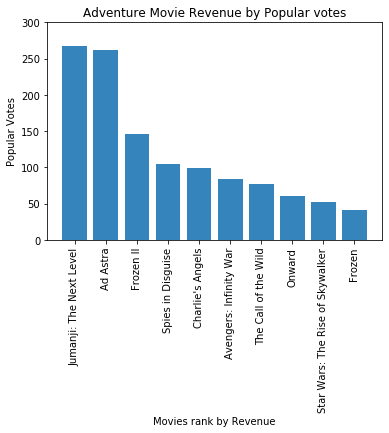

In [18]:
objects = df_adv['title']
# y_pos = np.arange(len(objects))
popularity= df_adv['popularity']

plt.bar(objects, popularity, align='center', alpha=.9)
plt.xticks(objects,rotation=90, rotation_mode="default")
plt.yticks(np.arange(0, 301, step=50))
plt.ylabel('Popular Votes')
plt.xlabel('Movies rank by Revenue')
plt.title('Adventure Movie Revenue by Popular votes')

plt.show()

In [19]:
pages3 = []
for i in range(1,501):
    pages3.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&page={i}&with_genres=35&with_original_language=en'))

In [20]:
comedy_movies = []
# i am adding all the pages(get request) into a new list 
for page in pages3:
    comedy_movies.append(requests.get(page))

In [21]:
comedy_json = []
for movie in comedy_movies:
    comedy_json.append(movie.json())

In [22]:
results = []
for item in comedy_json:
    results = results + item['results']

In [23]:
df2 = pd.DataFrame(results)

In [24]:
df2.set_index('title', inplace = True)

In [25]:
df2.reset_index(inplace=True)

In [26]:
df2.head(30)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,A Rainy Day in New York,1194.115,597,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",6.7,Two young people arrive in New York to spend a...,2019-07-26
1,Jumanji: The Next Level,267.705,1938,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
2,Sonic the Hedgehog,205.794,568,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",7.2,Based on the global blockbuster videogame fran...,2020-02-12
3,Spies in Disguise,104.718,234,False,/30YacPAcxpNemhhwX0PVUl9pVA3.jpg,431693,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,en,Spies in Disguise,"[28, 12, 16, 35]",7.3,Super spy Lance Sterling and scientist Walter ...,2019-12-24
4,Charlie's Angels,99.886,561,False,/1DPUFG6QnGqzpvEaDEv7TaepycM.jpg,458897,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,en,Charlie's Angels,"[28, 12, 35]",6.4,When a systems engineer blows the whistle on a...,2019-11-14
5,Knives Out,83.715,2495,False,/pThyQovXQrw2m0s9x82twj48Jq4.jpg,546554,False,/cjTQSwcsfVdirSFSHNBXRGkxmWa.jpg,en,Knives Out,"[35, 80, 18, 9648, 53]",7.8,When renowned crime novelist Harlan Thrombey i...,2019-11-27
6,Guns Akimbo,79.446,43,False,/2kNnf7BwRCEm4bcFkdiE0T4U25s.jpg,457335,False,/gL7TV2g9y9p3v7occ5bLrJ2p1qs.jpg,en,Guns Akimbo,"[28, 35]",6.2,An ordinary guy suddenly finds himself forced ...,2020-02-27
7,Birds of Prey (and the Fantabulous Emancipatio...,93.026,936,False,/h4VB6m0RwcicVEZvzftYZyKXs6K.jpg,495764,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,en,Birds of Prey (and the Fantabulous Emancipatio...,"[28, 35, 80]",6.8,"After her breakup with the Joker, Harley Quinn...",2020-02-05
8,Jojo Rabbit,65.884,2221,False,/7GsM4mtM0worCtIVeiQt28HieeN.jpg,515001,False,/agoBZfL1q5G79SD0npArSlJn8BH.jpg,en,Jojo Rabbit,"[35, 18, 10752]",8.1,A World War II satire that follows a lonely Ge...,2019-10-18
9,Onward,60.374,31,False,/3VqDLgKLfNYSQYEGC5sjGhcPhn7.jpg,508439,False,/bcT8CaBIj086WVD7K529h78eujb.jpg,en,Onward,"[12, 16, 35, 14, 10751]",7.8,"In a suburban fantasy world, two teenage elf b...",2020-02-29


In [27]:
df_com = df2[['title','popularity']].head(10) 
df_com

,title,popularity
0,A Rainy Day in New York,1194.115
1,Jumanji: The Next Level,267.705
2,Sonic the Hedgehog,205.794
3,Spies in Disguise,104.718
4,Charlie's Angels,99.886
5,Knives Out,83.715
6,Guns Akimbo,79.446
7,Birds of Prey (and the Fantabulous Emancipatio...,93.026
8,Jojo Rabbit,65.884
9,Onward,60.374


In [28]:
df_com['popularity']

0    1194.115
1     267.705
2     205.794
3     104.718
4      99.886
5      83.715
6      79.446
7      93.026
8      65.884
9      60.374
Name: popularity, dtype: float64

In [29]:
df_com['title']

0                              A Rainy Day in New York
1                              Jumanji: The Next Level
2                                   Sonic the Hedgehog
3                                    Spies in Disguise
4                                     Charlie's Angels
5                                           Knives Out
6                                          Guns Akimbo
7    Birds of Prey (and the Fantabulous Emancipatio...
8                                          Jojo Rabbit
9                                               Onward
Name: title, dtype: object

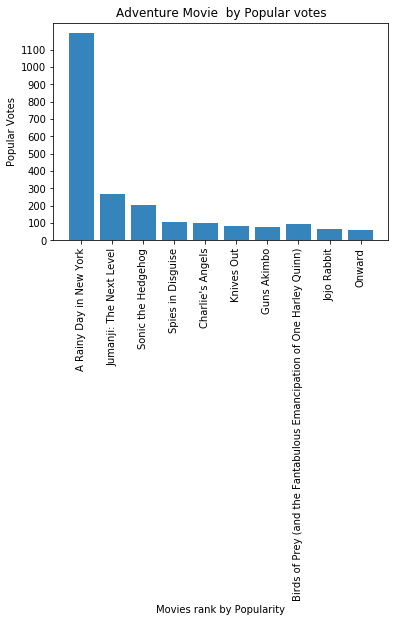

In [30]:
objects = df_com['title']
# y_pos = np.arange(len(objects))
popularity= df_com['popularity']

plt.bar(objects, popularity, align='center', alpha=0.9)
plt.xticks(objects,rotation=90, rotation_mode="default")
plt.yticks(np.arange(0, 1200, step=100))
plt.ylabel('Popular Votes')
plt.xlabel('Movies rank by Popularity')
plt.title('Adventure Movie  by Popular votes')

plt.show()

In [31]:
revenue_adv = []
for i in range(1,20):
    revenue_adv.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=revenue.desc&page={i}&with_genres=12&with_original_language=en'))
    
#revenue of adventure movie  
#we already sorted by revenue in a desending order

#Box office business can be measured in the terms of the number of tickets sold or the amount of
#money raised by ticket sales (revenue). The projection and analysis of these earnings is very important for 
#the creative industries and often a source of interest for fans. This is predominant in the Hollywood movie industry.

In [32]:
# revenue_adv

In [33]:
revenue_movies = []
# i am adding all the pages(get request) into a new list 
for page in revenue_adv:
    revenue_movies.append(requests.get(page))

In [34]:
revenue_movies

[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

In [35]:
revenue_json = []
for movie in revenue_movies:
    revenue_json.append(movie.json())

In [36]:
results = []
for item in revenue_json:
    results = results + item['results']

In [37]:
df3 = pd.DataFrame(results)

In [38]:
df3.set_index('title', inplace = True)

In [39]:
df3.reset_index(inplace=True)

In [40]:
df3.drop(df3[df3['popularity'] < 5.0].index, inplace = True)

In [41]:
df3.head(20)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,Avengers: Endgame,43.045,11409,False,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,299534,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,en,Avengers: Endgame,"[28, 12, 878]",8.3,After the devastating events of Avengers: Infi...,2019-04-24
1,Avatar,28.714,20399,False,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,19995,False,/aHcth2AXzZSjhX7JYh7ie73YVNc.jpg,en,Avatar,"[28, 12, 14, 878]",7.4,"In the 22nd century, a paraplegic Marine is di...",2009-12-10
3,Star Wars: The Force Awakens,30.432,13867,False,/weUSwMdQIa3NaXVzwUoIIcAi85d.jpg,140607,False,/c2Ax8Rox5g6CneChwy1gmu4UbSb.jpg,en,Star Wars: The Force Awakens,"[28, 12, 14, 878]",7.4,Thirty years after defeating the Galactic Empi...,2015-12-15
4,Avengers: Infinity War,84.390,16905,False,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,299536,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,en,Avengers: Infinity War,"[28, 12, 878]",8.3,As the Avengers and their allies have continue...,2018-04-25
5,Jurassic World,24.247,15088,False,/jjBgi2r5cRt36xF6iNUEhzscEcb.jpg,135397,False,/t5KONotASgVKq4N19RyhIthWOPG.jpg,en,Jurassic World,"[28, 12, 878, 53]",6.6,Twenty-two years after the events of Jurassic ...,2015-06-06
6,The Lion King,40.758,4588,False,/2bXbqYdUdNVa8VIWXVfclP2ICtT.jpg,420818,False,/nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg,en,The Lion King,"[12, 10751]",7.1,"Simba idolizes his father, King Mufasa, and ta...",2019-07-12
7,The Avengers,36.306,21590,False,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,24428,False,/hbn46fQaRmlpBuUrEiFqv0GDL6Y.jpg,en,The Avengers,"[28, 12, 878]",7.7,When an unexpected enemy emerges and threatens...,2012-04-25
8,Avengers: Age of Ultron,35.761,15097,False,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,99861,False,/rFtsE7Lhlc2jRWF7SRAU0fvrveQ.jpg,en,Avengers: Age of Ultron,"[28, 12, 878]",7.3,When Tony Stark tries to jumpstart a dormant p...,2015-04-22
9,Black Panther,34.763,14338,False,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,284054,False,/6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg,en,Black Panther,"[28, 12, 14, 878]",7.4,King T'Challa returns home from America to the...,2018-02-13
10,Harry Potter and the Deathly Hallows: Part 2,26.824,12950,False,/fTplI1NCSuEDP4ITLcTps739fcC.jpg,12445,False,/n5A7brJCjejceZmHyujwUTVgQNC.jpg,en,Harry Potter and the Deathly Hallows: Part 2,"[12, 14]",8.1,"Harry, Ron and Hermione continue their quest t...",2011-07-07


In [42]:
df3.shape

(367, 14)

In [43]:
type(df3['id'])

pandas.core.series.Series

In [44]:
id_list=list(df3['id'].values)

In [45]:
#id_list

In [46]:
df3.describe()

,popularity,vote_count,id,vote_average
count,367.000000,367.000000,367.000000,367.000000
mean,20.402768,6112.553134,99018.817439,6.686649
std,17.145584,4438.456313,127549.670151,0.747975
min,5.122000,453.000000,11.000000,4.600000
25%,13.264000,2692.000000,1987.000000,6.200000
50%,16.479000,4818.000000,32657.000000,6.600000
75%,23.490000,8507.500000,158101.000000,7.250000
max,267.705000,24669.000000,512200.000000,8.400000


In [48]:
budget_adv = []
for movieid in id_list:
    budget_adv.append(str(f'https://api.themoviedb.org/3/movie/{movieid}?api_key={config.api_key}&language=en-US'))
   

In [ ]:
budget_adv 

In [49]:
budget_movies = []
# i am adding all the pages(get request) into a new list 
for page in budget_adv:
    budget_movies.append(requests.get(page))

In [50]:
budget_json = []
for movie in budget_movies:
    budget_json.append(movie.json())

In [ ]:
budget_json

In [94]:
dfbu = pd.DataFrame(budget_json)

In [95]:
dfbu.set_index('title', inplace = True)

In [96]:
dfbu.reset_index(inplace=True)

In [97]:
dfbu.reset_index(inplace= True)

In [99]:
dfbu.drop(columns=['index'] , inplace= True)

In [101]:
dfbu

,title,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Avengers: Endgame,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2797800564,181,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Part of the journey is the end.,False,8.3,11420
1,Avatar,False,/aHcth2AXzZSjhX7JYh7ie73YVNc.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,False,7.4,20401
2,Star Wars: The Force Awakens,False,/c2Ax8Rox5g6CneChwy1gmu4UbSb.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,False,7.4,13872
3,Avengers: Infinity War,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2046239637,149,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An entire universe. Once and for all.,False,8.3,16908
4,Jurassic World,False,/t5KONotASgVKq4N19RyhIthWOPG.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-06,1671713208,124,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,False,6.6,15090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Storks,False,/yziCg46YIvmWAvPdztuZQqNBinW.jpg,None,70000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.storks-movie.net/,332210,tt4624424,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-09-22,182379278,87,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Find Your Flock,False,6.6,1470
363,Poseidon,False,/tUGSLoMcxNWZ0OIRSqDaB2jNbdE.jpg,None,160000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www2.warnerbros.com/poseidon/,503,tt0409182,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2006-05-10,181674817,99,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Mayday,False,5.7,1176
364,Scooby-Doo 2: Monsters Unleashed,False,/2vRVzvqY0tydcStBkNn73JPPOPL.jpg,"{'id': 86860, 'name': 'Scooby-Doo Collection',...",0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 14, '...",,11024,tt0331632,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2004-03-24,181466833,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They came. They saw. They ran.,False,5.7,1472
365,Allegiant,False,/p1dkPKpHJ32FvhKZSAUdA1JSYFi.jpg,"{'id': 283579, 'name': 'Divergent Collection',...",110000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.thedivergentseries.movie/#allegiant,262504,tt3410834,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-03-09,179246868,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Break the boundaries of your world,False,6.0,4578


In [57]:
dfbu['belongs_to_collection'].head(20)

0     {'id': 86311, 'name': 'The Avengers Collection...
1     {'id': 87096, 'name': 'Avatar Collection', 'po...
2     {'id': 10, 'name': 'Star Wars Collection', 'po...
3     {'id': 86311, 'name': 'The Avengers Collection...
4     {'id': 328, 'name': 'Jurassic Park Collection'...
5                                                  None
6     {'id': 86311, 'name': 'The Avengers Collection...
7     {'id': 86311, 'name': 'The Avengers Collection...
8     {'id': 529892, 'name': 'Black Panther Collecti...
9     {'id': 1241, 'name': 'Harry Potter Collection'...
10    {'id': 10, 'name': 'Star Wars Collection', 'po...
11    {'id': 386382, 'name': 'Frozen Collection', 'p...
12    {'id': 328, 'name': 'Jurassic Park Collection'...
13    {'id': 386382, 'name': 'Frozen Collection', 'p...
14    {'id': 468222, 'name': 'The Incredibles Collec...
15    {'id': 131292, 'name': 'Iron Man Collection', ...
16    {'id': 544669, 'name': 'Minions Collection', '...
17    {'id': 131295, 'name': 'Captain America Co

In [110]:
pretty= dfbu[['title','budget']]
pretty

,title,budget
0,Avengers: Endgame,356000000
1,Avatar,237000000
2,Star Wars: The Force Awakens,245000000
3,Avengers: Infinity War,300000000
4,Jurassic World,150000000
...,...,...
362,Storks,70000000
363,Poseidon,160000000
364,Scooby-Doo 2: Monsters Unleashed,0
365,Allegiant,110000000


In [58]:
df_rev = df3[['title','popularity']].head(10) 
df_rev

,title,popularity
0,Avengers: Endgame,43.045
1,Avatar,28.714
3,Star Wars: The Force Awakens,30.432
4,Avengers: Infinity War,84.390
5,Jurassic World,24.247
6,The Lion King,40.758
7,The Avengers,36.306
8,Avengers: Age of Ultron,35.761
9,Black Panther,34.763
10,Harry Potter and the Deathly Hallows: Part 2,26.824


In [59]:
df_rev['popularity']

0     43.045
1     28.714
3     30.432
4     84.390
5     24.247
6     40.758
7     36.306
8     35.761
9     34.763
10    26.824
Name: popularity, dtype: float64

In [60]:
df_rev['title']

0                                Avengers: Endgame
1                                           Avatar
3                     Star Wars: The Force Awakens
4                           Avengers: Infinity War
5                                   Jurassic World
6                                    The Lion King
7                                     The Avengers
8                          Avengers: Age of Ultron
9                                    Black Panther
10    Harry Potter and the Deathly Hallows: Part 2
Name: title, dtype: object

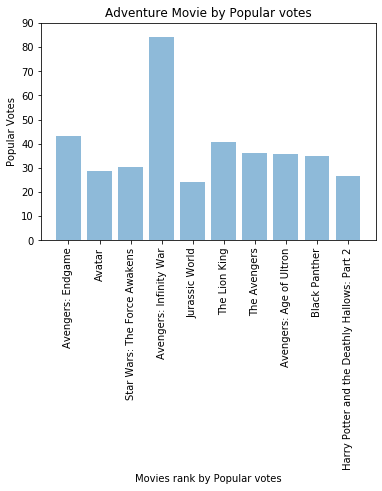

In [61]:
objects = df_rev['title']
# y_pos = np.arange(len(objects))
popularity= df_rev['popularity']

plt.bar(objects, popularity, align='center', alpha=0.5)
plt.xticks(objects,rotation=90, rotation_mode="default")
plt.yticks(np.arange(0, 91, step=10))
plt.ylabel('Popular Votes')
plt.xlabel('Movies rank by Popular votes')
plt.title('Adventure Movie by Popular votes')

plt.show()


In [62]:
revenue_com = []
for i in range(1,20):
    revenue_com.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=revenue.desc&page={i}&with_genres=35&with_original_language=en'))
#we already sorted by revenue in a desending order    
#revenure of comedy     

In [63]:
revenue_moviescom = []
# i am adding all the pages(get request) into a new list 
for page in revenue_com:
    revenue_moviescom.append(requests.get(page))

In [64]:
revenuecom_json = []
for movie in revenue_moviescom:
    revenuecom_json.append(movie.json())

In [65]:
results = []
for item in revenuecom_json:
    results = results + item['results']

In [66]:
df4 = pd.DataFrame(results)

In [67]:
df4.set_index('title', inplace = True)

In [68]:
df4.reset_index(inplace=True)

In [69]:
df4.drop(df4[df4['popularity'] < 5.0].index, inplace = True)


In [70]:
df4.head(25)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,Minions,11.634,7780,False,/q0R4crx2SehcEEQEkYObktdeFy.jpg,211672,False,/wiSIfl9FnXYGXzUKji7Muc3Oj3o.jpg,en,Minions,"[12, 16, 35, 10751]",6.4,"Minions Stuart, Kevin and Bob are recruited by...",2015-06-17
1,Toy Story 4,33.643,3776,False,/w9kR8qbmQ01HwnvK4alvnQ2ca0L.jpg,301528,False,/m67smI1IIMmYzCl9axvKNULVKLr.jpg,en,Toy Story 4,"[12, 16, 35, 14, 10751]",7.5,Woody has always been confident about his plac...,2019-06-19
2,Toy Story 3,17.747,9657,False,/mMltbSxwEdNE4Cv8QYLpzkHWTDo.jpg,10193,False,/y2qAjM37QgatWeG84DDtwsZuMW.jpg,en,Toy Story 3,"[16, 35, 10751]",7.8,"Woody, Buzz, and the rest of Andy's toys haven...",2010-06-16
3,Aladdin,48.934,4936,False,/3iYQTLGoy7QnjcUYRJy4YrAgGvp.jpg,420817,False,/rVqY0Bo4Npf6EIONUROxjYAJfmD.jpg,en,Aladdin,"[12, 35, 14, 10749, 10751]",7.0,A kindhearted street urchin named Aladdin emba...,2019-05-22
4,Despicable Me 3,14.097,4566,False,/6t3YWl7hrr88lCEFlGVqW5yV99R.jpg,324852,False,/ftRkFtAGuHngHnLiOxktq0aCVMF.jpg,en,Despicable Me 3,"[28, 12, 16, 35, 10751]",6.3,Gru and his wife Lucy must stop former '80s ch...,2017-06-15
5,Finding Dory,15.186,8640,False,/z09QAf8WbZncbitewNk6lKYMZsh.jpg,127380,False,/3iSCdXjDmY3DuEOUYsElu35vQU6.jpg,en,Finding Dory,"[12, 16, 35, 10751]",7.0,Dory is reunited with her friends Nemo and Mar...,2016-06-16
6,Zootopia,40.731,11113,False,/sM33SANp9z6rXW8Itn7NnG1GOEs.jpg,269149,False,/mhdeE1yShHTaDbJVdWyTlzFvNkr.jpg,en,Zootopia,"[16, 12, 10751, 35]",7.7,"Determined to prove herself, Officer Judy Hopp...",2016-02-11
8,Despicable Me 2,29.028,7989,False,/kQrYyZQHkwkUg2KlUDyvymj9FAp.jpg,93456,False,/rmgxcw8tGTmdhsWqdjGBS9uI1tO.jpg,en,Despicable Me 2,"[16, 35, 10751]",6.9,Gru is recruited by the Anti-Villain League to...,2013-06-25
9,Jumanji: Welcome to the Jungle,26.040,8610,False,/22hqf97LadMvkd4zDi3Bq25xSqD.jpg,353486,False,/rz3TAyd5kmiJmozp3GUbYeB5Kep.jpg,en,Jumanji: Welcome to the Jungle,"[28, 12, 35, 14]",6.7,The tables are turned as four teenagers are su...,2017-12-09
10,Shrek 2,14.999,7112,False,/eVBH2nDYbLWiUXYotADRAWK6sm6.jpg,809,False,/gdFAYLb5NR5HqcEKnPloOM6fX4B.jpg,en,Shrek 2,"[12, 16, 35, 10751, 14]",7.0,"Shrek, Fiona and Donkey set off to Far, Far Aw...",2004-05-19


In [71]:
df4.describe()

,popularity,vote_count,id,vote_average
count,375.000000,375.000000,375.000000,375.000000
mean,16.269373,3543.013333,86963.925333,6.488800
std,18.532256,3017.592377,131800.247891,0.667129
min,5.569000,403.000000,13.000000,4.300000
25%,10.666000,1588.000000,6017.000000,6.000000
50%,12.446000,2491.000000,11395.000000,6.400000
75%,16.263000,4392.000000,109447.000000,6.900000
max,267.705000,21911.000000,546554.000000,8.400000


In [72]:
df4.shape

(375, 14)

In [73]:
df_revcom = df4[['title','popularity']].head(11) 
df_revcom

,title,popularity
0,Minions,11.634
1,Toy Story 4,33.643
2,Toy Story 3,17.747
3,Aladdin,48.934
4,Despicable Me 3,14.097
5,Finding Dory,15.186
6,Zootopia,40.731
8,Despicable Me 2,29.028
9,Jumanji: Welcome to the Jungle,26.040
10,Shrek 2,14.999


In [74]:
df_revcom.drop(df_revcom[df_revcom['popularity'] < 5.0].index, inplace = True)


In [75]:
print(df_revcom) 

                             title  popularity
0                          Minions      11.634
1                      Toy Story 4      33.643
2                      Toy Story 3      17.747
3                          Aladdin      48.934
4                  Despicable Me 3      14.097
5                     Finding Dory      15.186
6                         Zootopia      40.731
8                  Despicable Me 2      29.028
9   Jumanji: Welcome to the Jungle      26.040
10                         Shrek 2      14.999
11  Ice Age: Dawn of the Dinosaurs      14.392


In [76]:
df_revcom['popularity']

0     11.634
1     33.643
2     17.747
3     48.934
4     14.097
5     15.186
6     40.731
8     29.028
9     26.040
10    14.999
11    14.392
Name: popularity, dtype: float64

In [77]:
df_revcom['title']

0                            Minions
1                        Toy Story 4
2                        Toy Story 3
3                            Aladdin
4                    Despicable Me 3
5                       Finding Dory
6                           Zootopia
8                    Despicable Me 2
9     Jumanji: Welcome to the Jungle
10                           Shrek 2
11    Ice Age: Dawn of the Dinosaurs
Name: title, dtype: object

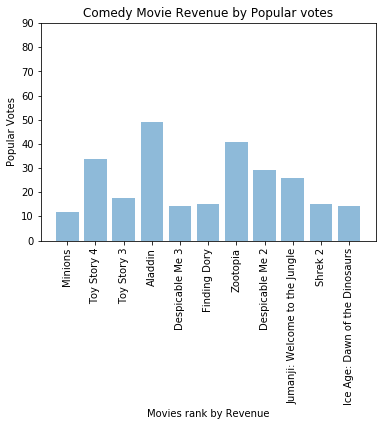

In [78]:
objects = df_revcom['title']
# y_pos = np.arange(len(objects))
popularity= df_revcom['popularity']

plt.bar(objects, popularity, align='center', alpha=0.5)
plt.xticks(objects,rotation=90, rotation_mode="default")
plt.yticks(np.arange(0, 91, step=10))
plt.ylabel('Popular Votes')
plt.xlabel('Movies rank by Revenue')
plt.title('Comedy Movie Revenue by Popular votes')

plt.show()


In [79]:
id_listcom=list(df4['id'].values)

In [80]:
budget_com = []
for movieid in id_list:
    budget_com.append(str(f'https://api.themoviedb.org/3/movie/{movieid}?api_key={config.api_key}&language=en-US'))
   

In [81]:
budget_comedymovies = []
# i am adding all the pages(get request) into a new list 
for page in budget_com:
    budget_comedymovies.append(requests.get(page))

In [82]:
budgetcomedy_json = []
for movie in budget_comedymovies:
    budgetcomedy_json.append(movie.json())

In [83]:
dfcomedybudget = pd.DataFrame(budgetcomedy_json)

In [84]:
dfcomedybudget.set_index('title', inplace = True)

In [85]:
dfcomedybudget.reset_index(inplace=True)

In [86]:
dfcomedybudget

,title,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Avengers: Endgame,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2797800564,181,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Part of the journey is the end.,False,8.3,11420
1,Avatar,False,/aHcth2AXzZSjhX7JYh7ie73YVNc.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,False,7.4,20401
2,Star Wars: The Force Awakens,False,/c2Ax8Rox5g6CneChwy1gmu4UbSb.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,False,7.4,13872
3,Avengers: Infinity War,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2046239637,149,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An entire universe. Once and for all.,False,8.3,16908
4,Jurassic World,False,/t5KONotASgVKq4N19RyhIthWOPG.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-06,1671713208,124,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,False,6.6,15090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Storks,False,/yziCg46YIvmWAvPdztuZQqNBinW.jpg,None,70000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.storks-movie.net/,332210,tt4624424,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-09-22,182379278,87,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Find Your Flock,False,6.6,1470
363,Poseidon,False,/tUGSLoMcxNWZ0OIRSqDaB2jNbdE.jpg,None,160000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www2.warnerbros.com/poseidon/,503,tt0409182,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2006-05-10,181674817,99,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Mayday,False,5.7,1176
364,Scooby-Doo 2: Monsters Unleashed,False,/2vRVzvqY0tydcStBkNn73JPPOPL.jpg,"{'id': 86860, 'name': 'Scooby-Doo Collection',...",0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 14, '...",,11024,tt0331632,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2004-03-24,181466833,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They came. They saw. They ran.,False,5.7,1472
365,Allegiant,False,/p1dkPKpHJ32FvhKZSAUdA1JSYFi.jpg,"{'id': 283579, 'name': 'Divergent Collection',...",110000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.thedivergentseries.movie/#allegiant,262504,tt3410834,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-03-09,179246868,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Break the boundaries of your world,False,6.0,4578
